In [4]:
#mapping some polygons - 
import pandas as pd
import geopandas as gpd
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point, LineString, shape
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import cm
import folium
import numpy as np
%matplotlib inline

In [5]:
#dataframes for csv files - Buffers
dfbuffer = pd.read_csv('bufferlatlongV2.csv', delimiter = ',').astype(float)
dfhurdat = pd.read_csv('hurdat_clean.csv', delimiter = ',')
dfcoast = pd.read_csv('coastlatlongV2.csv', delimiter = ',').astype(float)
dfbasin = pd.read_csv('jamesbasinlatlongV2.csv', delimiter = ',').astype(float)
dfhurdat.head()


,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Maxspeed,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,AL011851,UNNAMED,HU,28.0,-94.8,1851-06-25 00:00:00,80.0,NaN,NaN,NaN
1,AL011851,UNNAMED,HU,28.0,-95.4,1851-06-25 06:00:00,80.0,NaN,NaN,NaN
2,AL011851,UNNAMED,HU,28.0,-96.0,1851-06-25 12:00:00,80.0,NaN,NaN,NaN
3,AL011851,UNNAMED,HU,28.1,-96.5,1851-06-25 18:00:00,80.0,NaN,NaN,NaN
4,AL011851,UNNAMED,HU,28.2,-96.8,1851-06-25 21:00:00,80.0,NaN,NaN,NaN


In [43]:
#create the polygons
from pyproj import CRS
crs = CRS("WGS84")
buffer_geom =Polygon(zip(dfbuffer['Lon'],dfbuffer['Lat']))
basin_geom = Polygon(zip(dfbasin['Lon'],dfbasin['Lat']))
bufferpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [buffer_geom])
bufferpoly.set_crs(epsg=4326, inplace=True)
bufferpoly.to_file(filename = 'buffer.geojson', driver = 'GeoJSON')
basinpoly = gpd.GeoDataFrame(index = [0], crs = crs, geometry = [basin_geom])
basinpoly.to_file(filename = 'basin.geojson', driver = 'GeoJSON')

In [44]:
# convert points to lines in geopandas
# zip the coordinates into a point object and convert to a GeoDataFrame
geometry = [Point(xy) for xy in zip(dfhurdat['Lon'], dfhurdat['Lat'])]
hurdat_gfd = gpd.GeoDataFrame(dfhurdat, geometry = geometry)
geodfhd = hurdat_gfd.groupby(['Storm Number', 'Storm Name'])['geometry'].apply(lambda x:LineString(x.tolist()))
geodfhd = gpd.GeoDataFrame(geodfhd,geometry = 'geometry')
geodfhd.set_crs(epsg=4326, inplace=True)


,,geometry
Storm Number,Storm Name,
AL011851,UNNAMED,"LINESTRING (-94.80000 28.00000, -95.40000 28.0..."
AL011852,UNNAMED,"LINESTRING (-83.90000 25.20000, -84.60000 25.7..."
AL011854,UNNAMED,"LINESTRING (-92.50000 26.00000, -93.00000 26.0..."
AL011856,UNNAMED,"LINESTRING (-85.10000 25.70000, -86.50000 26.3..."
AL011857,UNNAMED,"LINESTRING (-74.50000 34.00000, -73.80000 34.5..."
...,...,...
AL241978,UNNAMED,"LINESTRING (-75.00000 30.00000, -74.70000 30.9..."
AL251969,KARA,"LINESTRING (-73.60000 25.70000, -73.30000 27.2..."
AL252005,WILMA,"LINESTRING (-81.70000 25.90000, -81.00000 26.2..."


In [54]:
# Intersect the linestrings with the polygon
storms_in_buffer = gpd.sjoin(geodfhd,bufferpoly, how = 'inner', op = 'intersects')
storms_in_buffer.head()
len(storms_in_buffer)

129

In [46]:
# import pandas as pd
# from datetime import datetime
# def lat_lon_to_float (v):
#     """Convert strings from NHC to float locations"""
#     if (v[-1] == 'S') or (v[-1] == 'W'):
#         multiplier = -1
#     else:
#         multiplier = 1
#     return float(v[:-1])*multiplier

In [47]:
# hurdata = []
# with open ('hurdat2.txt', 'r') as f:
#     for line in f.readlines():
#         if line.startswith('AL'):
#             storm_id = line.split(',')
#             storm_number = storm_id[0].strip()
#             storm_name = storm_id[1].strip()
#         else:
#             location_line = line.split(',')
#             dt = datetime.strptime(location_line[0] + location_line[1],"%Y%m%d %H%M")
#             storm_status = location_line[3].strip()
#             storm_lat = lat_lon_to_float(location_line[4].strip())
#             storm_lon = lat_lon_to_float(location_line[5].strip())
#             max_speed = float(location_line[6].strip())
#             hurdata.append([storm_number,storm_name,storm_status,storm_lat,storm_lon,dt,max_speed])

In [48]:
# df = pd.DataFrame(hurdata, columns = ['Storm Number','Storm Name', 'Storm Status', 'Lat', 'Lon','Time', 'Max Speed'])
# df.head()
# len(df)


In [49]:
# from sympy import Point, Polygon
# import pandas as pd
# import geopandas as gpd
# from shapely.geometry import *
# # # #changing to a GeoDataFrame to create geometry series
# # hurdatgdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Lon,df.Lat))
# # # hurdatgdf.head()
# # # len(hurdatgdf)
# # T = pd.merge(dfbuffer, dfhurdat, how='inner', on=['Lat', 'Lon'])
# # print(T)
# # len(T)
# # T
# dfinbuffer = pd.merge(dfhurdat,dfbuffer,on=['Lat','Lon'])
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(dfinbuffer)

In [75]:
# total map with all storms and buffers
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot


In [76]:
plot_crs = ccrs.LambertConformal(central_longitude =-100., central_latitude = 45)
data_crs = ccrs.PlateCarree()

AttributeError: 'list' object has no attribute 'kwargs'

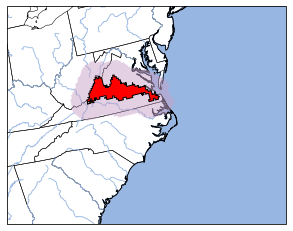

In [88]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


def basincoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    basinlon = dfbasin['Lon']
    basinlat = dfbasin['Lat']

    return basinlon, basinlat

def buffercoords():
    """
    Return a list of latitudes and a list of longitudes (lons, lats)
    for James River Basin 

    """
    bufferlon = dfbuffer['Lon']
    bufferlat = dfbuffer['Lat']
    

    return bufferlon, bufferlat
bufferlon, bufferlat = buffercoords()
basinlon, basinlat = basincoords()

#ax.set_title('James River Basin and Buffer - Virginia, USA')

# turn the lons and lats into a shapely LineString
buffer = sgeom.LineString(zip(bufferlon, bufferlat))
basin = sgeom.LineString(zip(basinlon, basinlat))


#fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1,projection = plot_crs)

ax.set_extent([-85,-70,32,40],data_crs)
ax.coastlines('50m', edgecolor = 'k', linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85)
ax.add_feature(cfeature.OCEAN)
ax.add_geometries([buffer], ccrs.PlateCarree(),facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([basin], ccrs.PlateCarree(),facecolor='rgb', edgecolor='k')
ax.add_feature([storms_in_buffer], edgecolor = 'k')



#for storm_number in vahurc['Storm Number'].unique():
    #data = df[jameshurc['Storm Number'] == storm_number]
    #print(vahurc)
#ax.plot(storms_in_buffer['geometry'] ,dfbuffer['Lon'],dfbuffer['Lat'],dfbasin['Lat'],dfbasin['Lon'], transform = data_crs)